# Optimización de Gastos de Marketing para Showz

## Introducción 

En el dinámico mundo de la venta de entradas para eventos, el departamento de analítica de Showz juega un papel crucial en la toma de decisiones estratégicas. Con un enfoque en la optimización de recursos, la misión será analizar y mejorar los gastos de marketing. Este desafío no solo impactará en la rentabilidad de la empresa, sino que también contribuirá a ofrecer experiencias más memorables a los asistentes. 

## Descripción de los datos

#### La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

-Uid: identificador único del usuario.

-Device: dispositivo del usuario.

-Start Ts: fecha y hora de inicio de la sesión.

-End Ts: fecha y hora de término de la sesión.

-Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

#### La tabla orders (datos sobre pedidos):

-Uid: identificador único del usuario que realiza un pedido.

-Buy Ts: fecha y hora del pedido. 

-Revenue: el ingreso de Showz por el pedido.

#### La tabla costs (datos sobre gastos de marketing):

-source_id: identificador de la fuente de anuncios.

-dt: fecha.

-costs: gastos en esta fuente de anuncios en este día.

## Acceso a los datos y prepáralos para el análisis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
visits_data = pd.read_csv('/datasets/visits_log_us.csv')

In [3]:
orders_data = pd.read_csv('/datasets/orders_log_us.csv')

In [4]:
cost_data = pd.read_csv ('/datasets/costs_us.csv')

In [5]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
visits_data.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [7]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders_data.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
cost_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
cost_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
    <p>En este caso las tres tablas contiene  el tipo de datos es incorrecto para las columnas "End Ts" y "Start Ts" (en el caso de visits_data), en la comuna "Buy Ts" (orders_data) y en la columna dt (costs_data) por lo que se les cambiara a un formato de fecha.
Además de eso para cuestiones prácticas, los nombre de las columnas se manejaran en minúsculas, por lo que se hará una conversión en las mayúsculas, así como los espacios que se encuentran en los títulos de las columnas se remplazaran con un guion bajo</p>
</div>


In [11]:
visits_data.columns = visits_data.columns.str.lower()
visits_data.columns = visits_data.columns.str.replace(' ', '_')

In [12]:
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'])
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'])


In [13]:
visits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [14]:
visits_data

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [15]:
orders_data.columns = orders_data.columns.str.lower()
orders_data.columns = orders_data.columns.str.replace(' ', '_')

In [16]:
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'])

In [17]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [18]:
orders_data

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [19]:
cost_data.columns = cost_data.columns.str.lower()
cost_data.columns = cost_data.columns.str.replace(' ', '_')

In [20]:
cost_data['dt'] = pd.to_datetime(cost_data['dt'])

In [21]:
cost_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Calculos de métricas


### Visitas 

¿Cuántas personas lo usan cada día, semana y mes?

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

¿Cuál es la duración de cada sesión?

¿Con qué frecuencia los usuarios regresan?

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [22]:
visits_data

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [23]:
visits_data['day'] = visits_data['start_ts'].astype('datetime64[D]')

In [24]:
visits_per_day = visits_data.groupby('day')['uid'].nunique()

In [25]:
visits_per_day

day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

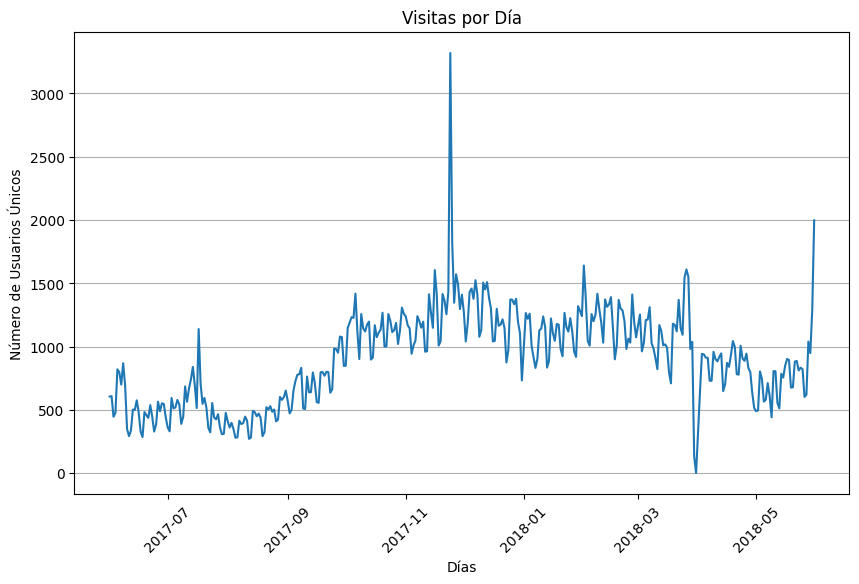

In [26]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(visits_per_day.index, visits_per_day.values)  

plt.title('Visitas por Día')
plt.xlabel('Días')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=45)  
plt.grid(axis='y') 


plt.show()


In [27]:
visits_per_day.describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: uid, dtype: float64

In [28]:
visits_data['week'] = visits_data['start_ts'].astype('datetime64[W]')

In [29]:
visits_per_week = visits_data.groupby('week')['uid'].nunique().reset_index()

In [30]:
visits_per_week

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055
5,2017-07-06,3563
6,2017-07-13,4790
7,2017-07-20,2978
8,2017-07-27,2505
9,2017-08-03,2343


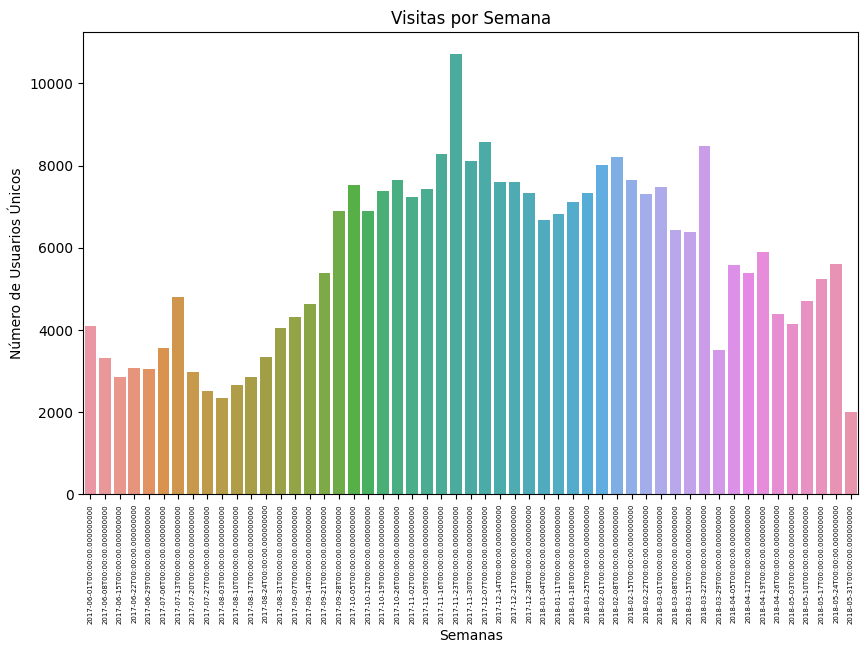

In [31]:

plt.figure(figsize=(10, 6))
sns.barplot(x= 'week', y= 'uid', data=visits_per_week)  

plt.title('Visitas por Semana')
plt.xlabel('Semanas')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=90, size = 5)  



plt.show()

In [32]:
visits_data ['month'] = visits_data['start_ts'].astype('datetime64[M]')

In [33]:
visits_per_month = visits_data.groupby('month')['uid'].nunique().reset_index()

In [34]:
visits_per_month 

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


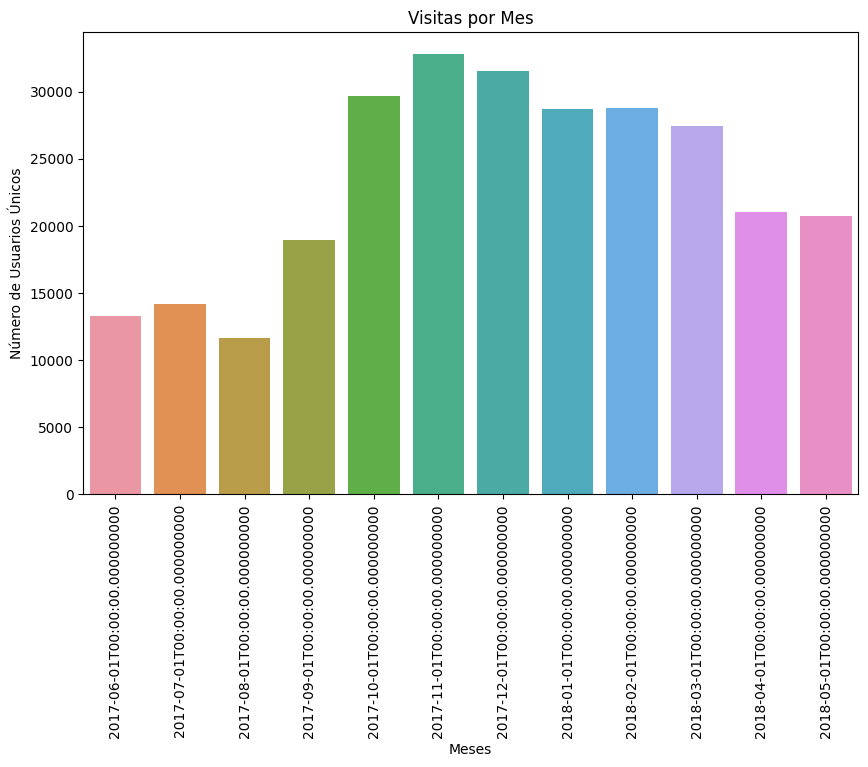

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'month', y= 'uid', data=visits_per_month)  

plt.title('Visitas por Mes')
plt.xlabel('Meses')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=90)  



plt.show()

#### ¿Cuántas sesiones hay por día? 

In [36]:
total_visits_per_day = visits_data.groupby('day')['uid'].count()

In [37]:
total_visits_per_day.describe()

count     364.000000
mean      987.362637
std       418.994796
min         1.000000
25%       635.500000
50%      1003.000000
75%      1280.000000
max      4042.000000
Name: uid, dtype: float64

Parece que el promedio de sesiones por días esta en las 987

In [38]:
print("Sesiones diarias:\n", total_visits_per_day)

Sesiones diarias:
 day
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Name: uid, Length: 364, dtype: int64


#### ¿Cuál es la duración de cada sesión?

In [39]:
visits_data['session_duration'] = (visits_data['end_ts']-visits_data['start_ts']).dt.total_seconds()/60

In [40]:
duracion_promedio_sesion = visits_data.groupby('day')['session_duration'].mean()

In [41]:

duracion_promedio_sesion

day
2017-06-01    11.105346
2017-06-02    10.330674
2017-06-03    10.115968
2017-06-04     9.238497
2017-06-05    10.407503
                ...    
2018-05-27     9.282738
2018-05-28    10.546987
2018-05-29    10.490467
2018-05-30    10.678463
2018-05-31    12.329211
Name: session_duration, Length: 364, dtype: float64

In [42]:
visits_data

,device,end_ts,source_id,start_ts,uid,day,week,month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,18.000000
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,28.000000
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.000000
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,24.000000
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0.000000
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,0.316667
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,0.316667
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,0.316667
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,0.316667


#### ¿Con qué frecuencia los usuarios regresan?

In [43]:
frequency = visits_data.groupby('uid')['day'].agg(['min','max'])
frequency['days_between'] = (frequency['max']-frequency['min']).dt.days

In [44]:
frequency

,min,max,days_between
uid,,,
11863502262781,2018-03-01,2018-03-01,0
49537067089222,2018-02-06,2018-02-06,0
297729379853735,2017-06-07,2017-06-07,0
313578113262317,2017-09-18,2018-03-11,174
325320750514679,2017-09-30,2018-02-26,149
...,...,...,...
18446403737806311543,2017-11-30,2017-11-30,0
18446424184725333426,2017-12-06,2017-12-06,0
18446556406699109058,2018-01-01,2018-01-01,0


In [45]:
frequency.describe()

,days_between
count,228169.000000
mean,16.165610
std,49.930561
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,364.000000


Un promedio de 16 días? a pesar de que el máximo de días que ha dejado pasar un usuario para volver a entrar es de 364, parece un buen número. 

### Ventas

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

¿Cuántos pedidos hacen durante un período de tiempo dado?

¿Cuál es el tamaño promedio de compra?

¿Cuánto dinero traen? (LTV)

#### ¿Cuándo empieza la gente a comprar?

In [46]:
first_visit = visits_data.groupby('uid')['start_ts'].min().reset_index()
first_visit.rename(columns={'start_ts': 'first_visit'}, inplace=True)

In [47]:
first_purchase = orders_data.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase'}, inplace=True)

In [48]:
first_purchase_visit = pd.merge(first_visit, first_purchase, on='uid', how='left')

In [49]:
first_purchase_visit

,uid,first_visit,first_purchase
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,NaT
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT
228165,18446424184725333426,2017-12-06 20:32:00,NaT
228166,18446556406699109058,2018-01-01 16:29:00,NaT
228167,18446621818809592527,2017-12-27 13:27:00,NaT


In [50]:
first_purchase_visit['days_to_convert'] = (first_purchase_visit['first_purchase'] - first_purchase_visit['first_visit']).dt.days


In [51]:
first_purchase_visit

,uid,first_visit,first_purchase,days_to_convert
0,11863502262781,2018-03-01 17:27:00,NaT,NaN
1,49537067089222,2018-02-06 15:55:00,NaT,NaN
2,297729379853735,2017-06-07 18:47:00,NaT,NaN
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106.0
4,325320750514679,2017-09-30 14:29:00,NaT,NaN
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT,NaN
228165,18446424184725333426,2017-12-06 20:32:00,NaT,NaN
228166,18446556406699109058,2018-01-01 16:29:00,NaT,NaN
228167,18446621818809592527,2017-12-27 13:27:00,NaT,NaN


In [52]:
first_purchase_visit['conversion_category'] = first_purchase_visit['days_to_convert'].apply(lambda x: f'Conversion {x}d' if x >= 0 else 'No Conversion')


In [53]:
first_purchase_visit

,uid,first_visit,first_purchase,days_to_convert,conversion_category
0,11863502262781,2018-03-01 17:27:00,NaT,NaN,No Conversion
1,49537067089222,2018-02-06 15:55:00,NaT,NaN,No Conversion
2,297729379853735,2017-06-07 18:47:00,NaT,NaN,No Conversion
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106.0,Conversion 106.0d
4,325320750514679,2017-09-30 14:29:00,NaT,NaN,No Conversion
...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT,NaN,No Conversion
228165,18446424184725333426,2017-12-06 20:32:00,NaT,NaN,No Conversion
228166,18446556406699109058,2018-01-01 16:29:00,NaT,NaN,No Conversion
228167,18446621818809592527,2017-12-27 13:27:00,NaT,NaN,No Conversion


In [54]:
conversion_counts = first_purchase_visit['conversion_category'].value_counts().reset_index()
conversion_counts.columns = ['conversion_category', 'user_count']


In [55]:
conversion_counts

,conversion_category,user_count
0,No Conversion,191646
1,Conversion 0.0d,26363
2,Conversion 1.0d,1011
3,Conversion 2.0d,563
4,Conversion 3.0d,434
...,...,...
341,Conversion 297.0d,1
342,Conversion 337.0d,1
343,Conversion 304.0d,1
344,Conversion 354.0d,1


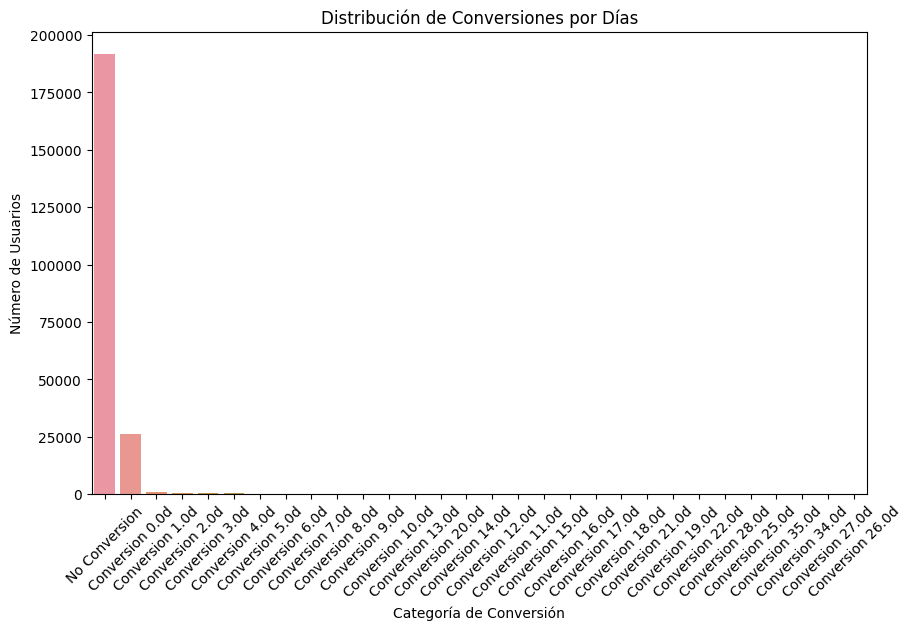

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='conversion_category', y='user_count', data=conversion_counts.head(30))
plt.title('Distribución de Conversiones por Días')
plt.ylabel('Número de Usuarios')
plt.xlabel('Categoría de Conversión')
plt.xticks(rotation=45)
plt.show()

#### ¿Cuántos pedidos hacen durante un período de tiempo dado? 

<div style="background-color: #E6E6FA; padding: 10px; border-radius: 5px;">
    <p>En este apartado no se especifico cuánto debe durar el periodo de tiempo, por lo que se eligira basandonos en las tablas obtenidas de visitas por mes, se eligio el mes de enero del 2018 ya que a pesar de que no es el mes con mayor número de visitas, se encuentra cerca del prodmedio</p>
</div>


In [57]:
start_date = '2018-01-01'
end_date = '2018-01-31'

period_orders= orders_data[(orders_data['buy_ts'] >= start_date) & (orders_data['buy_ts'] <= end_date)]


In [58]:
total_orders = period_orders.shape[0]
print(f'Total de pedidos entre {start_date} y {end_date}: {total_orders}')


Total de pedidos entre 2018-01-01 y 2018-01-31: 4510


#### ¿Cuál es el tamaño promedio de compra?

In [59]:
average_order_size_per_user = orders_data.groupby('uid')['revenue'].mean().reset_index(name='average_order_size')
print(average_order_size_per_user.describe())


                uid  average_order_size
count  3.652300e+04        36523.000000
mean   9.213152e+18            4.093093
std    5.324792e+18            7.671220
min    3.135781e+14            0.000000
25%    4.615081e+18            1.285000
50%    9.245161e+18            2.490000
75%    1.383709e+19            4.890000
max    1.844617e+19          657.466250


#### ¿Cuánto dinero traen? (LTV)

In [60]:
visits_data['start_ts'] = pd.to_datetime(visits_data['start_ts'], format="%Y.%m.%d %H:%M:%S")
visits_data['end_ts'] = pd.to_datetime(visits_data['end_ts'], format="%Y.%m.%d %H:%M:%S")


In [61]:
visits_data['session_month'] = visits_data['start_ts'].astype('datetime64[M]')
visits_data['session_week'] = visits_data['start_ts'].astype('datetime64[W]')
visits_data['session_date'] = visits_data['start_ts'].dt.date

In [62]:
first_visits = visits_data.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

In [63]:
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')


In [64]:
visits_total = pd.merge(first_visits, visits_data, on='uid')

In [65]:
visits_total['age_months'] = ((visits_total['session_month'] - visits_total['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

In [66]:
orders_data['buy_dt'] = orders_data['buy_ts'].dt.date
orders_data['order_month'] = orders_data['buy_ts'].astype('datetime64[M]')

In [67]:
first_orders = orders_data.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [68]:
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])


buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

In [69]:
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)


In [70]:
cohorts = pd.merge(orders_data, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()


In [71]:
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()

cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

In [72]:
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

In [73]:
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_ltv = cohorts_ltv.round(2)

cohorts_ltv.index = cohorts_ltv.index.astype(str)

Text(95.72222222222221, 0.5, 'Cohort (First Order Month)')

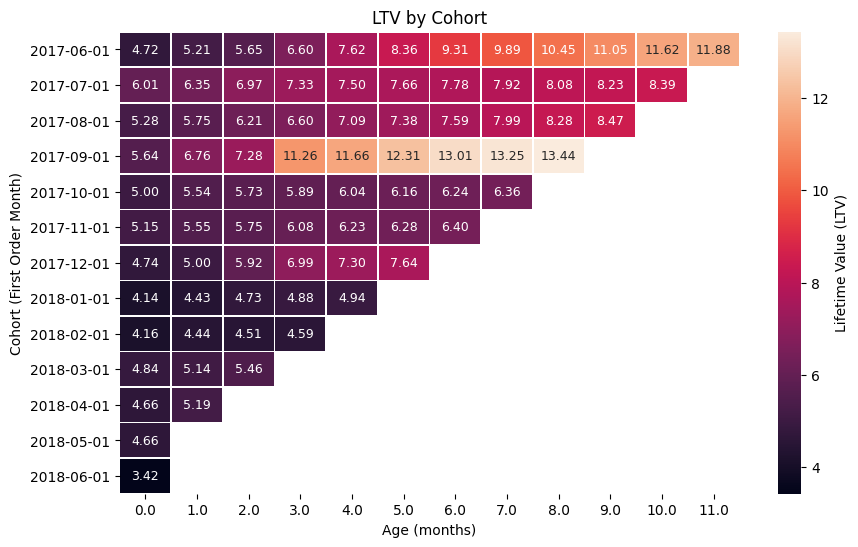

In [74]:
plt.figure(figsize=(10, 6))  
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

Parece que un cliente genera más ingresos a partir de mayo y junio comienza a incrementar el LTV, Menos por el mes de septiembre del 2017 quien tiene más rápido ingresos por parte del cliente.  

In [75]:
#orders_data['order_month'] = orders_data['buy_ts'].astype('datetime64[M]')


In [76]:
#first_orders = orders_data.groupby('uid').agg({'order_month': 'min'}).reset_index()
#first_orders.columns = ['uid', 'first_order_month']

In [77]:
#cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
#cohort_sizes.columns = ['first_order_month', 'n_buyers']


In [78]:
#orders_ = pd.merge(orders_data,first_orders, on='uid')
#cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
#report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [79]:
#import numpy as np
#margin_rate = 0.5

#report['gp'] = report['revenue'] * margin_rate
#report['age'] = (
    #report['order_month'] - report['first_order_month']
#) / np.timedelta64(1, 'M')
#report['age'] = report['age'].round().astype('int')

#report.head()

In [80]:
#report['ltv'] = report['gp'] / report['n_buyers']

#output = report.pivot_table(
    #index='first_order_month', 
    #columns='age', 
    #values='ltv', 
    #aggfunc='mean').round()

#output.fillna('')


Parece que no hay much repetición en las compras...

### Marketing 

 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)
 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes
 
 3. ¿Cuán rentables eran las inversiones? (ROMI)



#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [81]:
total_spent = cost_data['costs'].sum()
print(f"Gasto total en marketing: {total_spent}")


Gasto total en marketing: 329131.62


In [82]:
cost_by_source = cost_data.groupby('source_id')['costs'].sum().reset_index()
cost_by_source.columns = ['source_id', 'total_costs']
print(cost_by_source)


   source_id  total_costs
0          1     20833.27
1          2     42806.04
2          3    141321.63
3          4     61073.60
4          5     51757.10
5          9      5517.49
6         10      5822.49


AEste ha sido el costo de adquisición. 

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes

Primero encontraremos los gastos totales de cada mes, luego los dividiremos entre la cantidad de clientes en cada cohorte:

In [83]:
#cost_data['month'] = cost_data['dt'].astype('datetime64[M]')
#monthly_costs = cost_data.groupby('month').sum()
#monthly_costs.head()

In [84]:
#report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
#report_['cac'] = report_['costs'] / report_['n_buyers']
#report_.head()

In [85]:
cost_data['costs_month'] = cost_data['dt'].astype('datetime64[M]')

In [86]:
print("CAC medio es:", round(cost_data['costs'].sum() / orders_data['uid'].nunique(), 2))

CAC medio es: 9.01


In [87]:
CAC_month = pd.merge(cost_data.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_month['cac'] = CAC_month['costs'] / CAC_month['uid']


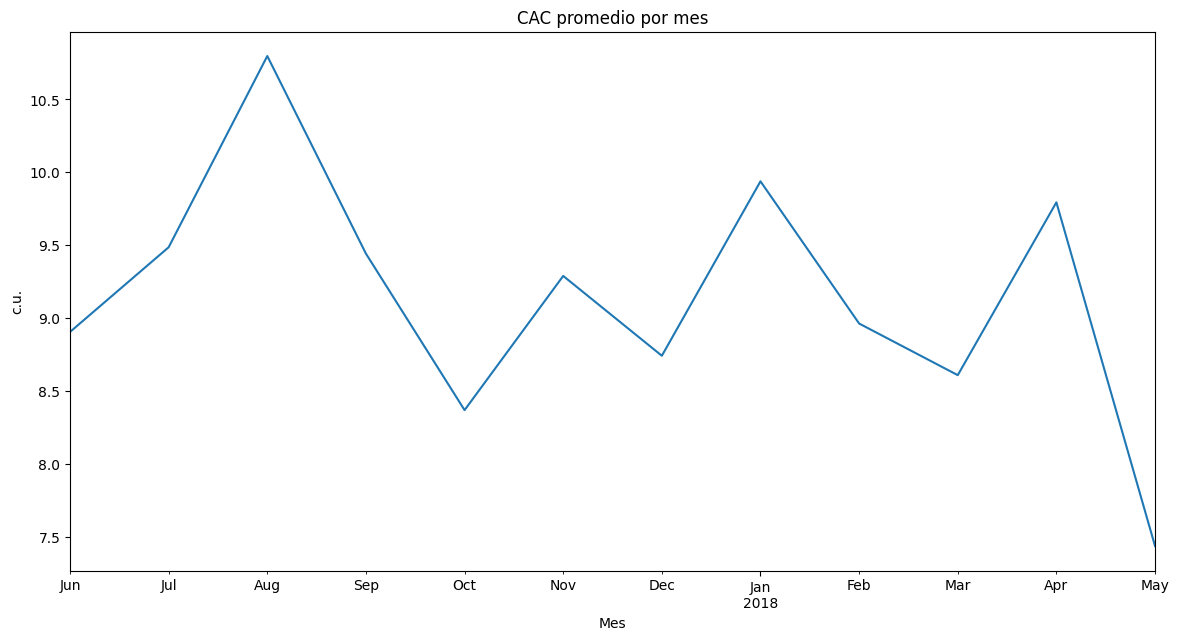

In [88]:
CAC_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')
plt.show()

In [89]:
users = visits_total.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [90]:
costs_ = pd.merge(buyers_daily, cost_data, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']


In [91]:
costs_

,source_id,first_order_dt,n_buyers,dt,costs,costs_month,cac
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,3.171111
...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01,4.960000
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01,2.126000
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01,1.617143
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01,6.630000


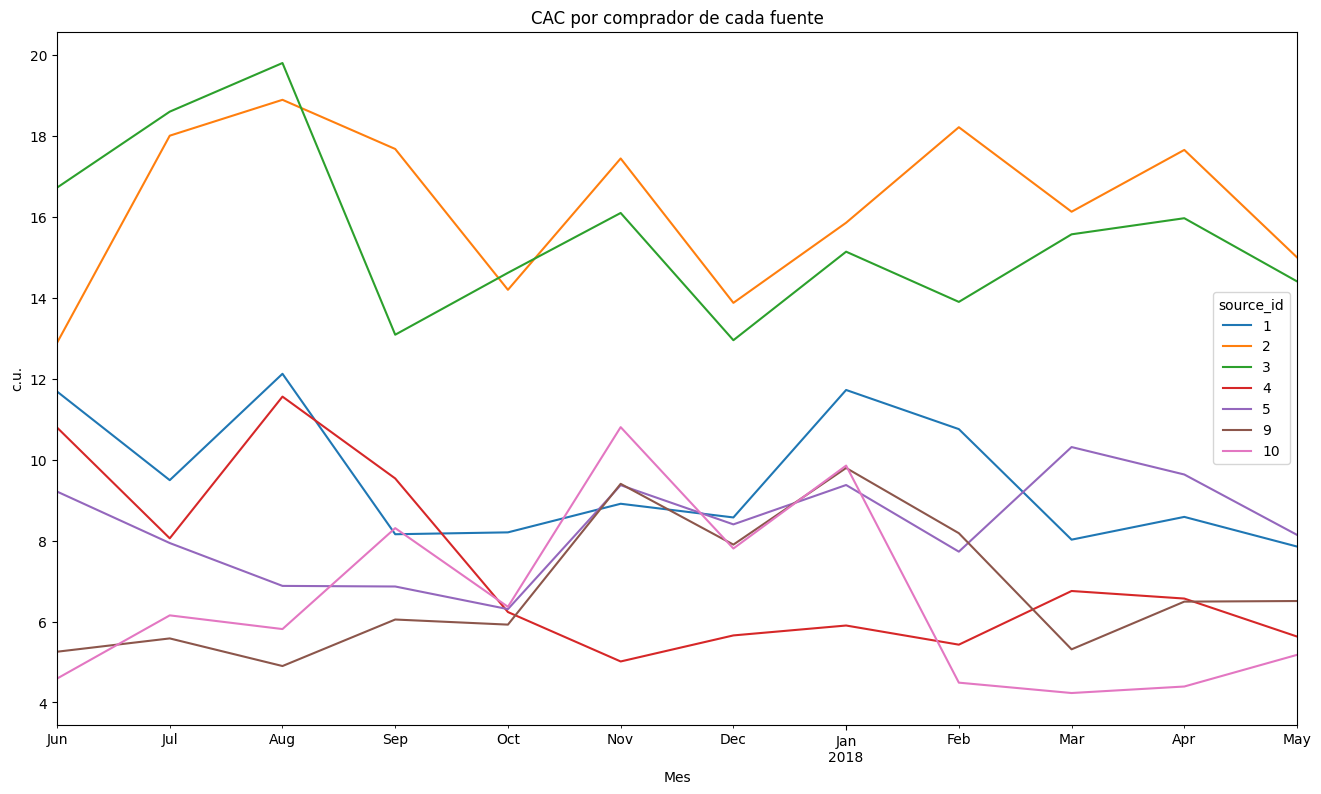

In [92]:
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

In [93]:
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


#### ¿Cuán rentables eran las inversiones? (ROMI)

In [94]:
month_revenue = orders_data.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

In [95]:
for source, df in buyers.groupby('source_id'):
    if source != 7:
       
    
        cohort_sizes_total = (
            df.groupby(['source_id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()       )
        cohort_sizes_total.columns = ['source_id', 'first_order_month', 'n_buyers']

In [96]:
cohorts_revenue_total = (df.groupby(['source_id', 'first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
cohorts_revenue_total.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

In [97]:
report_romi = pd.merge(cohort_sizes_total, cohorts_revenue_total, on=['source_id', 'first_order_month'])
report_romi['age'] = (report_romi['order_month'] - report_romi['first_order_month']) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

In [98]:
report_romi = pd.merge(report_romi, cost_data.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])


In [99]:
report_romi

,source_id,first_order_month,n_buyers,order_month,gp,age,ltv,costs_month,costs
0,10,2017-06-01,95,2017-06-01,229.35,0,2.414211,2017-06-01,314.22
1,10,2017-06-01,95,2017-07-01,11.06,1,0.116421,2017-06-01,314.22
2,10,2017-06-01,95,2018-02-01,0.85,8,0.008947,2017-06-01,314.22
3,10,2017-07-01,51,2017-07-01,176.53,0,3.461373,2017-07-01,329.82
4,10,2017-07-01,51,2017-08-01,1.59,1,0.031176,2017-07-01,329.82
5,10,2017-07-01,51,2017-10-01,7.63,3,0.149608,2017-07-01,329.82
6,10,2017-07-01,51,2018-03-01,0.37,8,0.007255,2017-07-01,329.82
7,10,2017-08-01,37,2017-08-01,184.90,0,4.997297,2017-08-01,232.57
8,10,2017-08-01,37,2017-09-01,4.15,1,0.112162,2017-08-01,232.57
9,10,2017-08-01,37,2017-10-01,12.22,2,0.330270,2017-08-01,232.57


In [100]:
report_romi = report_romi.drop(['costs_month'], axis=1)
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

In [101]:
romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
romi.round(2).fillna('')
romi.index = romi.index.astype(str)


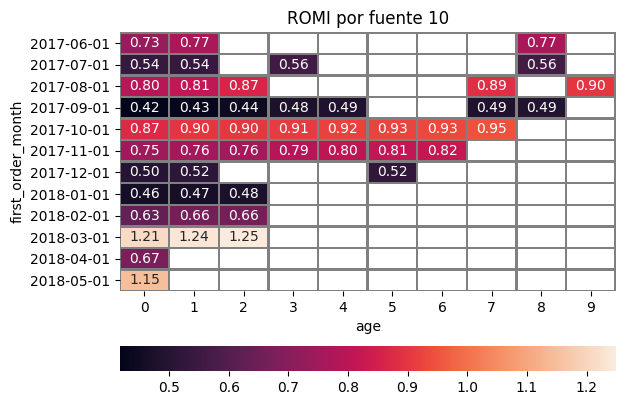

In [102]:
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}).set(title='ROMI por fuente {}'.format(source))
plt.show()

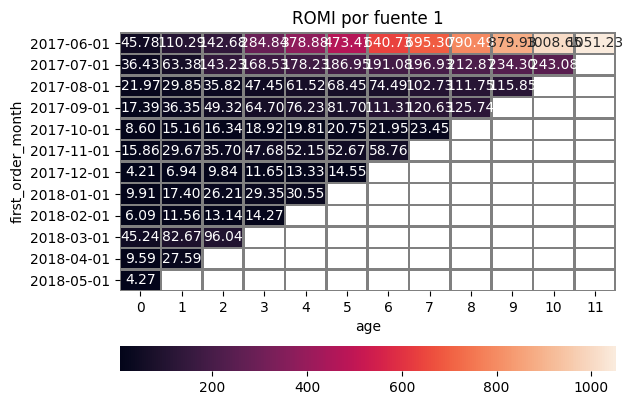

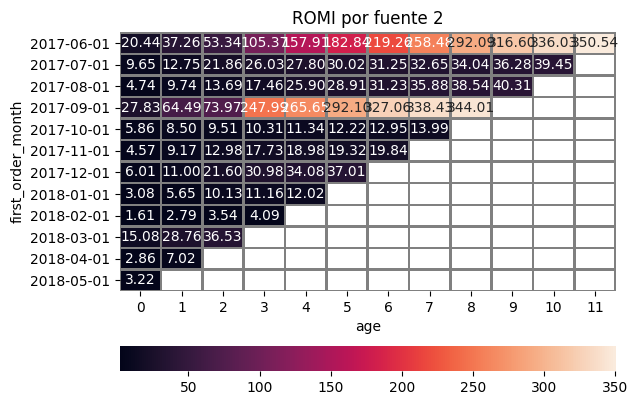

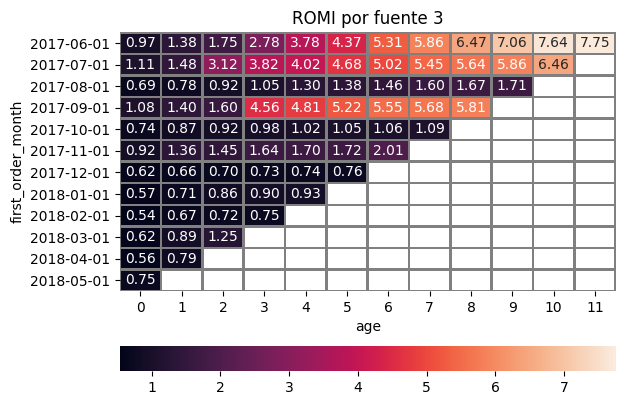

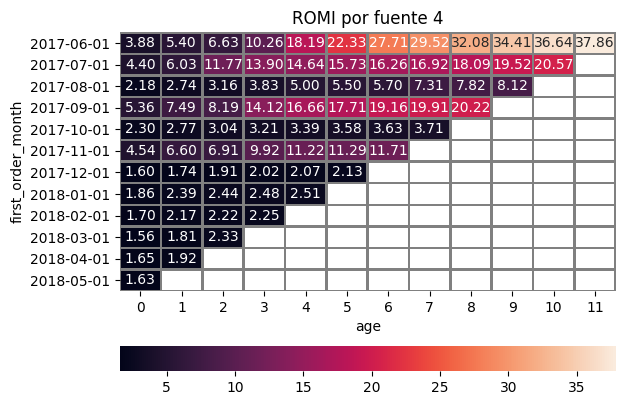

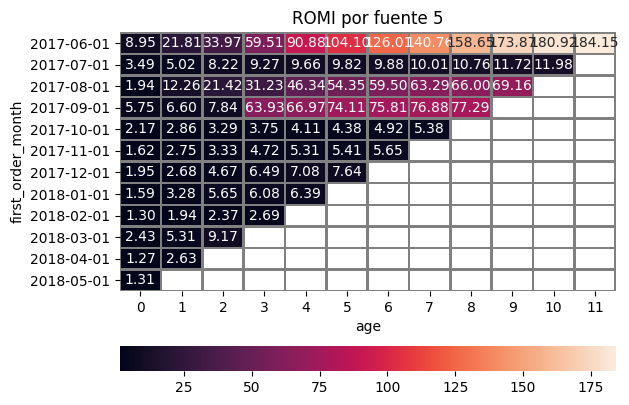

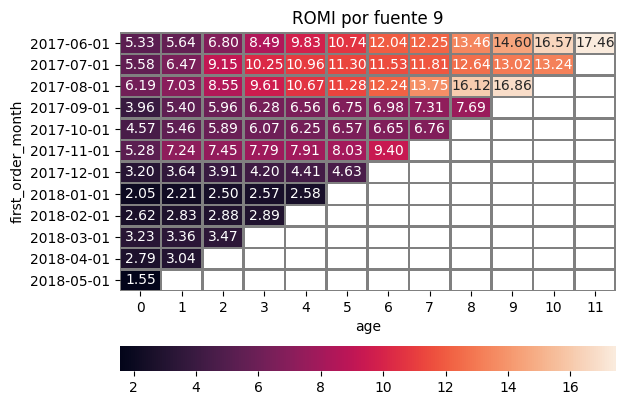

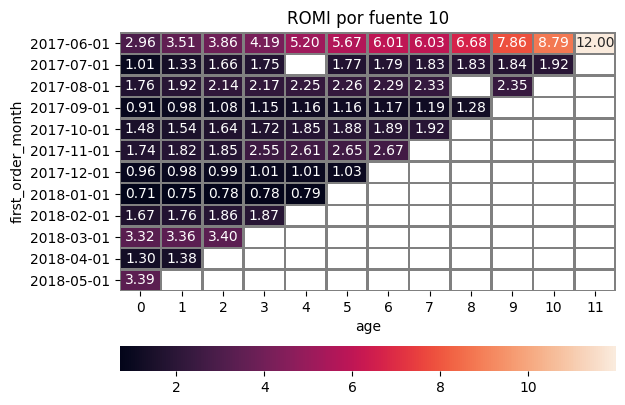

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos de visitas desde un archivo CSV
visits = pd.read_csv('/datasets/visits_log_us.csv')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M:%S")
visits = visits.rename(columns={"Device": "device", "End Ts": "session_end_ts", 
                                "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})

# Cargar datos de pedidos desde un archivo CSV
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})

# Extraer el mes de compra para la columna 'order_month'
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# Crear un dataframe con las primeras órdenes
buyers = pd.merge(visits[['uid', 'source_id']], first_orders, on='uid')

# LTV
# Determinar el tamaño de cada cohorte de compradores
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()

# Calcular la antigüedad de las cohortes
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

# Fusionar el tamaño de las cohortes con los ingresos y calcular LTV
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

# Costos
# Cargar datos de costos desde un archivo CSV
costs = pd.read_csv('/datasets/costs_us.csv')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Asegúrate de que 'order_month' esté presente en df
        df = pd.merge(df, orders[['uid', 'order_month', 'revenue']], on='uid', how='left')

        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()



## Conclusion

#### LTV. 
Se observa que para muchos grupos de clientes, el LTV tiende a aumentar con el tiempo. Esto es una señal positiva, ya que indica que los clientes están volviendo a comprar o están generando más ingresos.Aunque es muy importante destacarque el cohorte que se unio en septiembre del 2017, se observa que los clientes generaron mayor ltv, es el unico cohorte que tiene un salto de casi la mita de su valor inicial.
Mientras que para los cohortes que se unieron durante enero y febrero del 2018, su incremento es más lento al de lozxs demás. 

#### CAC
El CAC es mucho mayor que el LTV!, Apesar de que hay compras y generalmente estos van aumentado, sale más caro adquirir los clientes que lo que ellos nos aportan, hay problemas en las estrategias o una necesidad de optimización. 

#### ROMI
Los números son bastante bajos, aunque esto marca que las campañas o el marketing generaron dinero es muy poco. 

Aunque se estan generando ingresos, se esta gastamnado mucho en marketing, podría ser desastrozo sino se hace algo antes. 

Dado que hay meses con ROMI muy bajo, sería prudente evaluar las campañas de esos períodos para identificar qué pudo haber fallado.Se debe llevar un proceso de optimización paraa identificar las campañas que generaron un ROMI alto ya que estas podrían guiar futuras estrategias, enfocándose en las tácticas que funcionaron mejor.

CAC medio es: 9.01


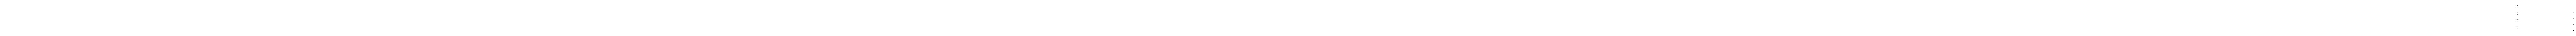

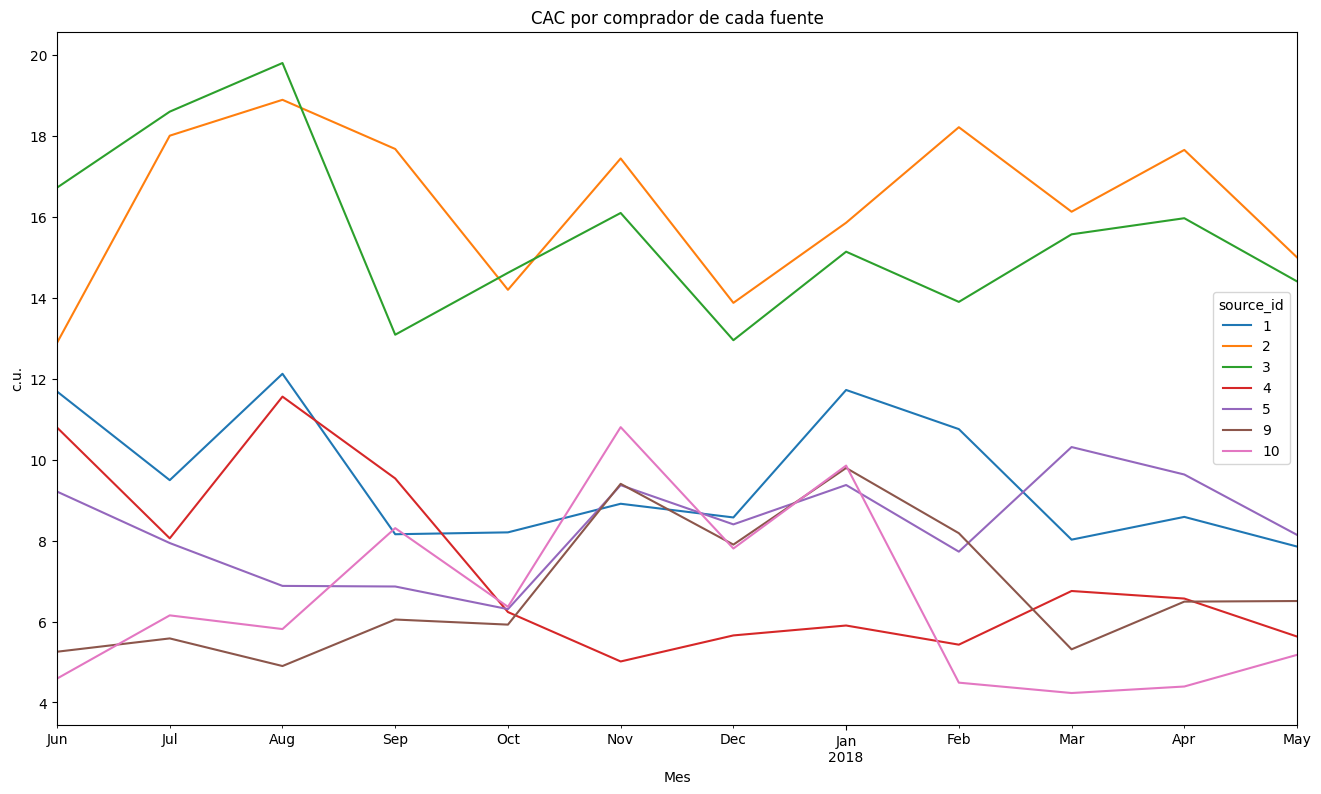

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


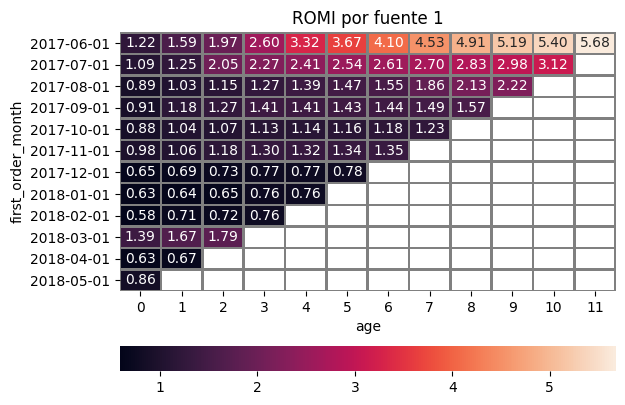

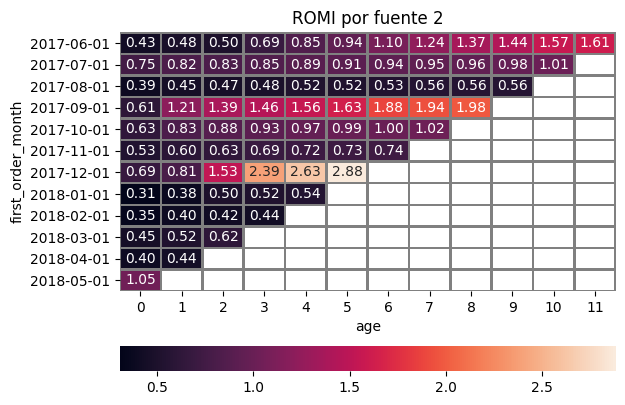

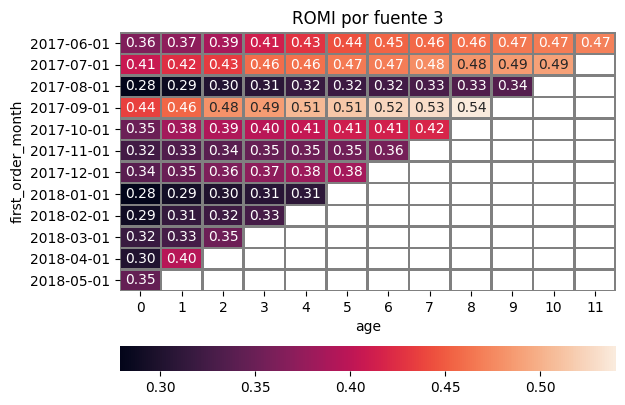

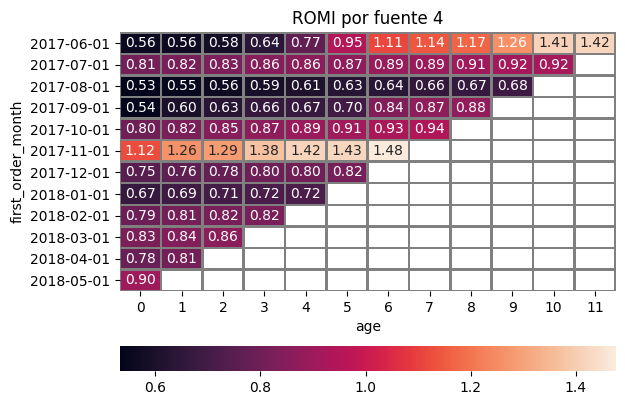

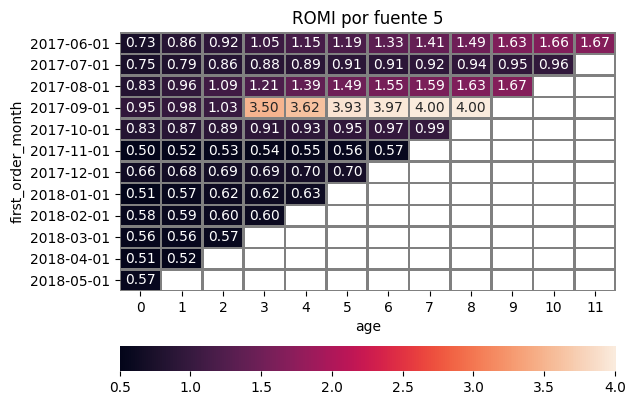

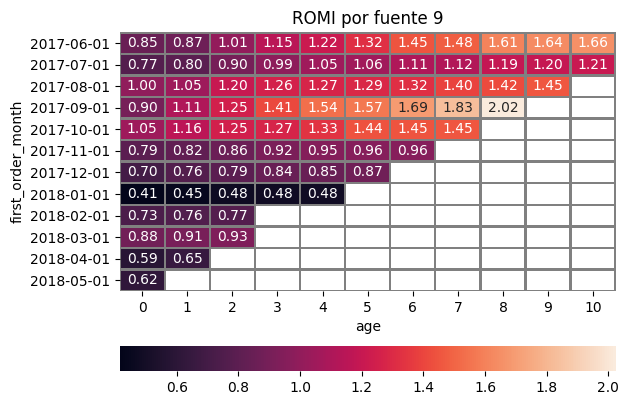

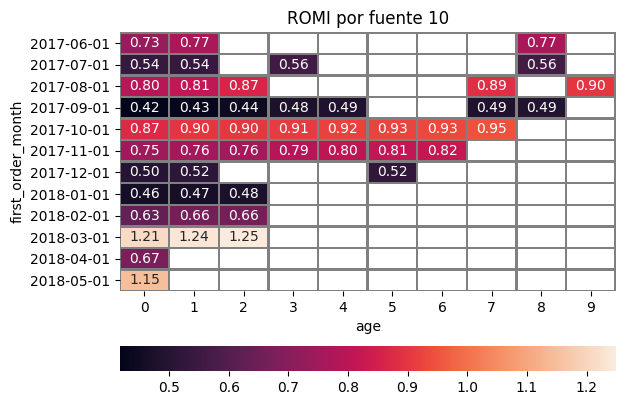

In [4]:
# Cargar datos de visitas desde un archivo CSV
visits = pd.read_csv('/datasets/visits_log_us.csv')

# Convertir las columnas de tiempos de inicio y fin de las visitas al formato de fecha y hora
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M:%S")
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M:%S")

# Renombrar las columnas para mayor claridad
visits = visits.rename(columns={"Device": "device", "End Ts": "session_end_ts", 
                                "Source Id": "source_id", "Start Ts": "session_start_ts", "Uid": "uid"})

# Extraer el mes, la semana y la fecha de inicio de sesión
visits['session_month'] = visits['session_start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['session_start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['session_start_ts'].dt.date

# Encontrar la primera visita de cada usuario
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')

# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

# Cargar datos de pedidos desde un archivo CSV
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders = orders.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue", "Uid": "uid"})

# Extraer el día y el mes de compra
orders['buy_dt'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

# LTV
# Determinar el tamaño de cada cohorte de compradores
# Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
# Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
# Calcula la suma de los ingresos para cada grupo.
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'sum'}).reset_index()

# Calcular la antigüedad de las cohortes
# Calcula la 'edad' de cada cohorte desde su primera compra, en meses.
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
# Actualiza los nombres de las columnas para reflejar los datos que contienen.
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

# Crear el informe de cohortes y calcular el LTV
# Une 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave.
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

# Preparar la tabla pivote para la visualización
# Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorts_ltv.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

# Costos
# Cargar datos de costos desde un archivo CSV
costs = pd.read_csv('/datasets/costs_us.csv')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

# Calcular el CAC medio
print("CAC medio es:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))

# Calcular el CAC por mes
CAC_by_month = pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')

# Encontrar la primera fuente por visitante
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16, 9), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

# Calcular el CAC promedio por fuente
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)


# Calcular ingresos mensuales por usuario
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()